In [62]:
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl
import random

<Axes: >

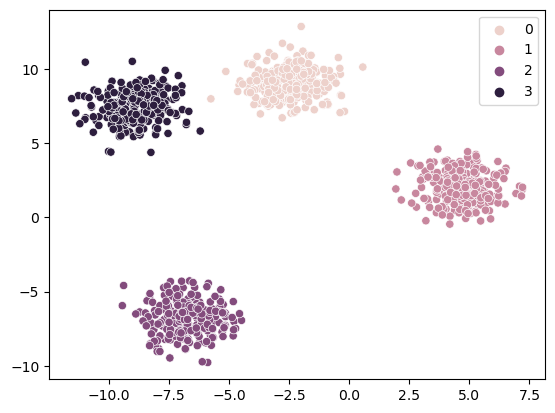

In [63]:
X,_ = make_blobs(n_samples=1000,centers=4,random_state=42)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=_)

In [33]:
model = KMeans(n_clusters=1)
model.fit(X)

C:\Users\91771\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1)

In [44]:
y= model.labels_
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s = 60)

AttributeError: 'CustomKMeans' object has no attribute 'labels_'

# Custom K Means

In [73]:
class Cluster:
    def __init__(self,center,label):
        self.center = center
        self.label = label
        self.points=[]
    def distance(self,point):
        return np.sqrt(np.sum((self.center - point)**2))
class CustomKMeans:
    def __init__(self,n_clusters=3,n_iters = 10):
        self.n_clusters = n_clusters
        self.n_iters = n_iters
    def fit(self,X):
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(random.choice(X),i)
            clusters.append(cluster)
        
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        for i in range(self.n_iters):
            labels = []
            for point in X:
                distances = [] 
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                minDist = np.argmin(distances)
                clusters[minDist].points.append(point)
                labels.append(minDist)
            for cluster in clusters:
                cluster.center = np.mean(cluster.points,axis=0)
        self.labels = labels
            
        

<Axes: >

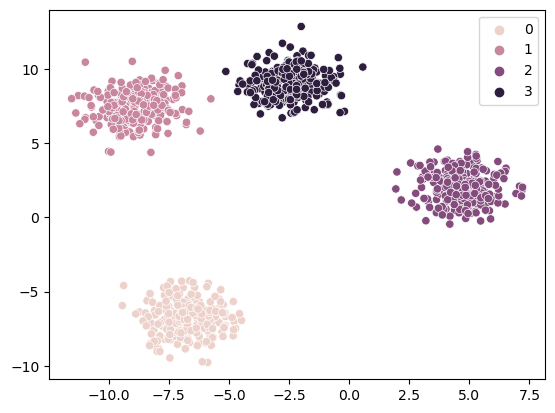

In [75]:
model = CustomKMeans(n_clusters=4,n_iters=10)
model.fit(X)
y= model.labels
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)